In [1]:
import pandas as pd
BlendDF = pd.read_csv('BlendedReviews.csv') 

In [2]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import multiprocessing


from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import StackingClassifier

In [3]:
"""
Five Emotions Approach and other variables approach
First group of models are binary models predicting positive or negative rating
SVM Models have been excluded due to high number of continuous variables makes processing power/time overwhelming
"""

#Split data into training and test sets with a 80/20 split for all binary models
#Based on the very low coefficients for both WordCount and vote, these variables were left out of the models.
X = BlendDF[['Joy','Anger','Sadness','Fear','Disgust','Short','Verified','Long','IsImage']] #set independent variables for regression
Y = BlendDF['BinaryRating'] #set dependent variable for regression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) #Split into 80/20 train and test sets

#Run Naive Bayes Classifier
NB = GaussianNB()
NB.fit(X_train, Y_train)

#Look at ability of model to predict test set
NBScore = round((NB.score(X_test, Y_test))*100,2)
print('Naive Bayes Classifier Score is for Five Emotions Model: ',NBScore,'%','\n')
Y_pred = NB.predict(X_test)
print(classification_report(Y_test, Y_pred, zero_division=0), '\n')

#Run binary logistic regression
LR = linear_model.LogisticRegression(solver='lbfgs',max_iter=10000)
LR.fit(X_train, Y_train)

#Look at ability of model to predict test set
LRScore = round((LR.score(X_test, Y_test))*100,2)
print('Binary Logistic Model Score for Five Emotions Model: ',LRScore,'%','\n')
Y_pred = LR.predict(X_test)
print(classification_report(Y_test, Y_pred, zero_division=0), '\n')

Naive Bayes Classifier Score is for Five Emotions Model:  82.56 % 

              precision    recall  f1-score   support

           0       0.23      0.01      0.02      2127
           1       0.83      0.99      0.90     10407

    accuracy                           0.83     12534
   macro avg       0.53      0.50      0.46     12534
weighted avg       0.73      0.83      0.75     12534
 

Binary Logistic Model Score for Five Emotions Model:  83.05 % 

              precision    recall  f1-score   support

           0       0.51      0.06      0.10      2127
           1       0.84      0.99      0.91     10407

    accuracy                           0.83     12534
   macro avg       0.67      0.52      0.50     12534
weighted avg       0.78      0.83      0.77     12534
 



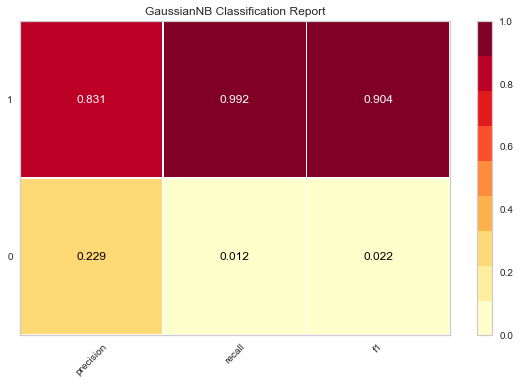

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [4]:
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(GaussianNB())
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()

D:\Anaconda 2\envs\DSC\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


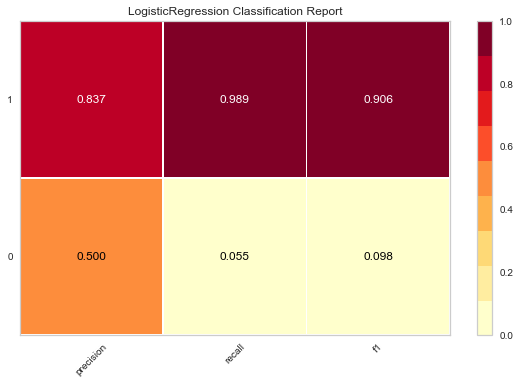

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [5]:
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
viz = ClassificationReport(LogisticRegression())
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()

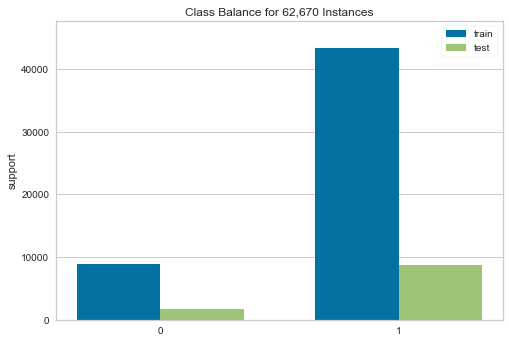

<AxesSubplot:title={'center':'Class Balance for 62,670 Instances'}, ylabel='support'>

In [6]:
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.target import ClassBalance

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

# Instantiate the visualizer
visualizer = ClassBalance()

visualizer.fit(Y_train, Y_test)    
visualizer.show()

In [7]:
"""
Five Emotions Approach and other variables approach
Second group of models are multiclass models for 1-5 rating
SVM Models have been excluded due to high number of continuous variables makes processing power/time overwhelming
"""

#Split data into training and test sets with a 80/20 split for multiclass models
#Based on the very low coefficients for both WordCount, vote and categories, these variables were left out of the models.
X = BlendDF[['Joy','Anger','Sadness','Fear','Disgust','Short','Verified','Long','IsImage']] #set independent variables for regression
Y = BlendDF['overall'] #set dependent variable for regression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) #Split into 80/20 train and test sets

#Run multinomial logistic regression
MLR = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000)
MLR.fit(X_train, Y_train)

#Look at ability of model to predict test set
MLRScore = round((MLR.score(X_test, Y_test))*100,2)
print('Multinomial Logistic Model Score for Five Emotions Model: ',MLRScore,'%','\n')
Y_pred = MLR.predict(X_test)
print(classification_report(Y_test, Y_pred, zero_division=0), '\n')

#Run K Nearest Neighbors Algorithm
KNN = KNeighborsClassifier(n_neighbors = 15)
KNN.fit(X_train, Y_train)

#Look at ability of model to predict test set
KNNScore = round((KNN.score(X_test, Y_test))*100,2)
print('K Nearest Neighbors Algorithm Model Score for Five Emotions Model: ',KNNScore,'%','\n')
Y_pred = KNN.predict(X_test)
print(classification_report(Y_test, Y_pred, zero_division=0), '\n')

#Run Random Forest Algorithm
RF = RandomForestClassifier(n_estimators=5, random_state=0)
RF.fit(X_train, Y_train)

#Look at ability of model to predict test set
RFScore = round((RF.score(X_test, Y_test))*100,2)
print('Random Forest Classifier Model Score for Five Emotions Model: ',RFScore,'%','\n')
Y_pred = RF.predict(X_test)
print(classification_report(Y_test, Y_pred, zero_division=0), '\n')

Multinomial Logistic Model Score for Five Emotions Model:  59.99 % 

              precision    recall  f1-score   support

           1       0.33      0.10      0.16      1445
           2       0.30      0.00      0.01       682
           3       0.29      0.01      0.01       999
           4       0.27      0.01      0.03      1921
           5       0.61      0.98      0.75      7487

    accuracy                           0.60     12534
   macro avg       0.36      0.22      0.19     12534
weighted avg       0.48      0.60      0.47     12534
 

K Nearest Neighbors Algorithm Model Score for Five Emotions Model:  58.31 % 

              precision    recall  f1-score   support

           1       0.35      0.24      0.29      1445
           2       0.16      0.02      0.04       682
           3       0.11      0.02      0.04       999
           4       0.21      0.07      0.10      1921
           5       0.64      0.91      0.75      7487

    accuracy                        

D:\Anaconda 2\envs\DSC\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda 2\envs\DSC\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


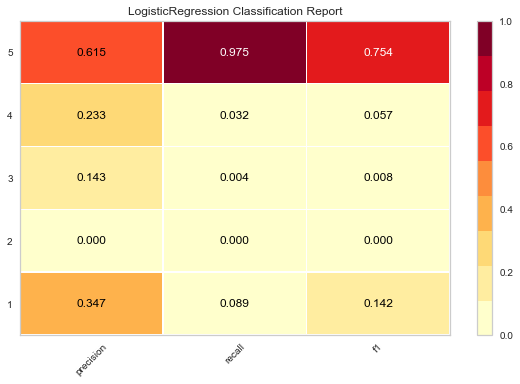

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [8]:
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
viz = ClassificationReport(LogisticRegression())
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()

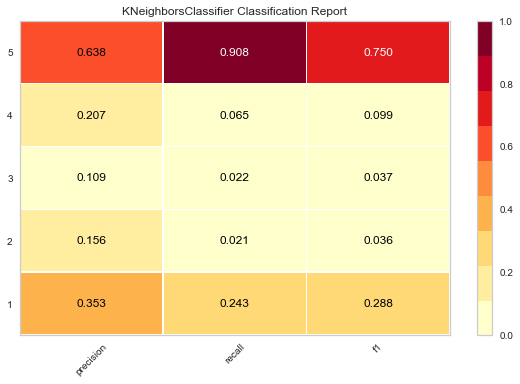

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [9]:
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(KNeighborsClassifier(n_neighbors = 15))
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()

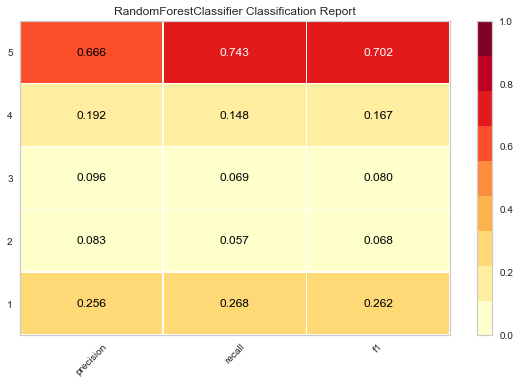

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [10]:
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(RandomForestClassifier(n_estimators=5, random_state=0))
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()

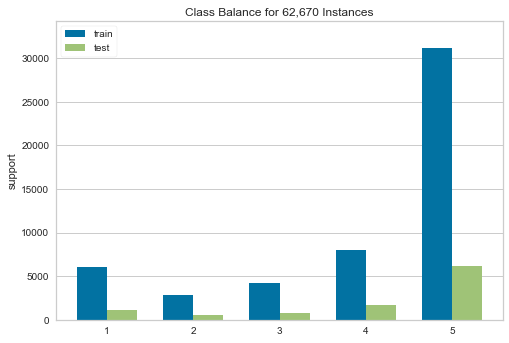

<AxesSubplot:title={'center':'Class Balance for 62,670 Instances'}, ylabel='support'>

In [18]:
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.target import ClassBalance


# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

# Instantiate the visualizer
visualizer = ClassBalance()

visualizer.fit(Y_train, Y_test)        
visualizer.show()                      